Premières lignes :
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PrixMedMaison  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  

Stats basiques :
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min       

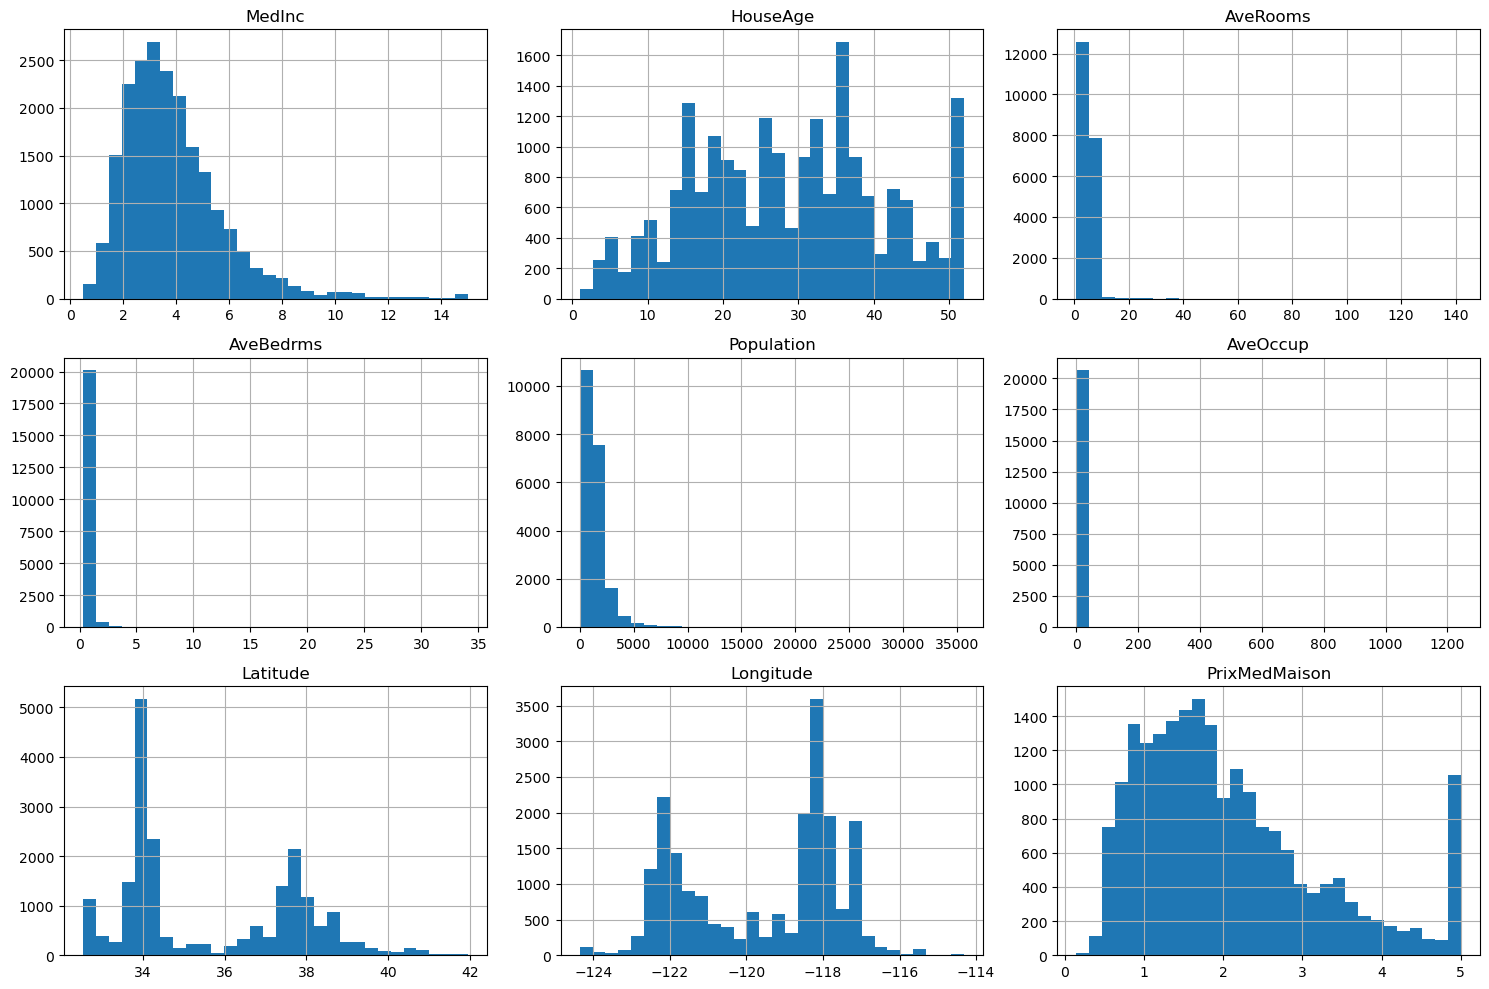

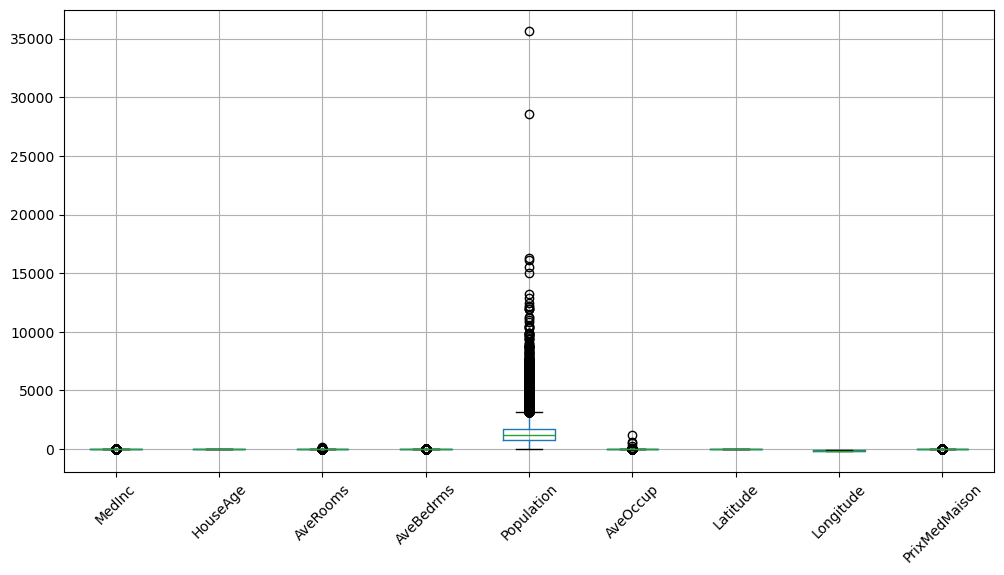

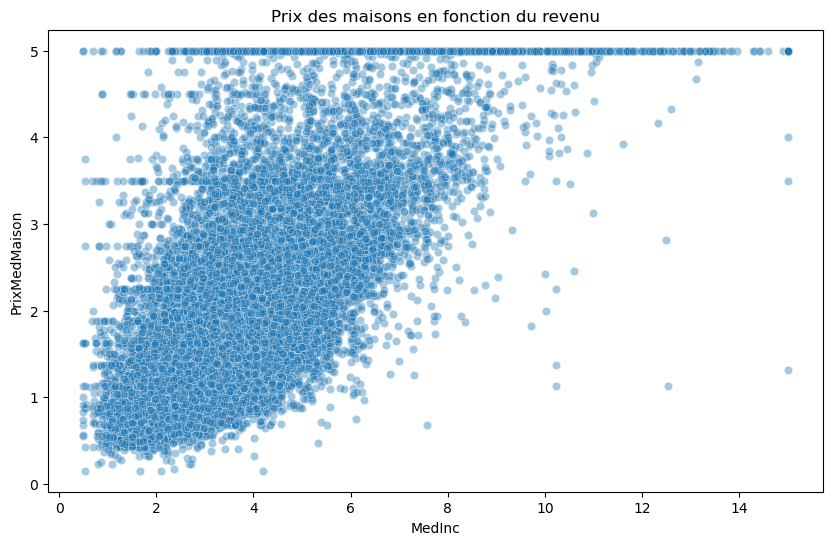

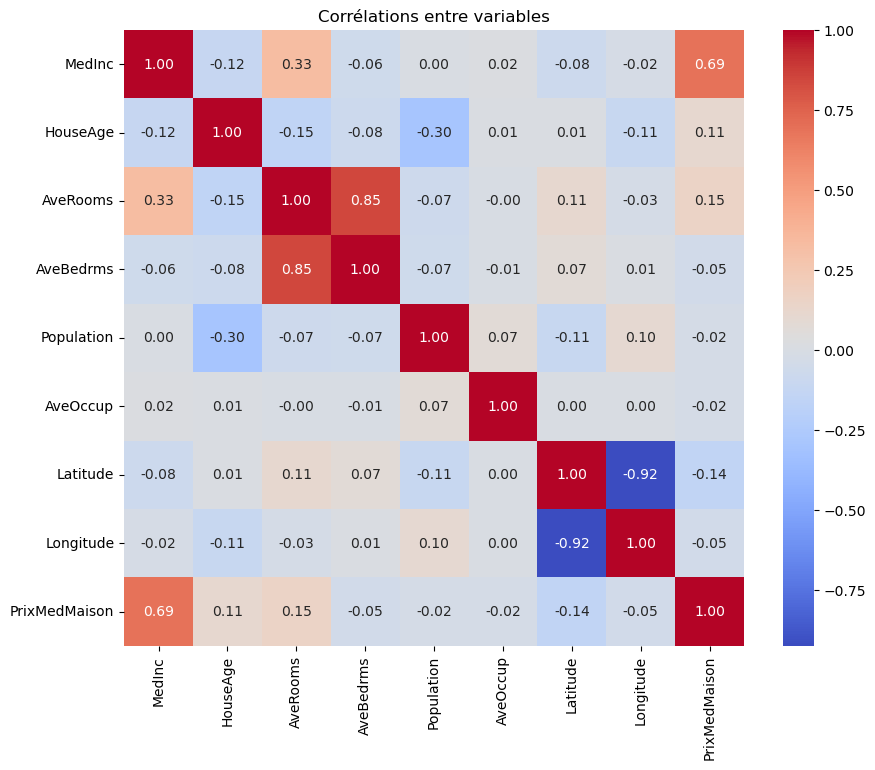


Tailles des jeux de données :
Train : 12384 exemples
Validation : 4128 exemples
Test : 4128 exemples

Performance du modèle linéaire :
Erreur quadratique moyenne : 0.53
Erreur absolue moyenne : 0.53
R² : 0.59

Performance Ridge :
MSE: 0.53
MAE: 0.53
R²: 0.59

Performance Lasso :
MSE: 0.53
MAE: 0.53
R²: 0.59

Performance finale sur le test :

Performance Ridge (test) :
MSE: 0.55
MAE: 0.53
R²: 0.60

Intervalle de confiance à 95.0% : ±1.4594

Importance des variables :
     Variable  Coefficient
6    Latitude    -0.884572
7   Longitude    -0.860890
0      MedInc     0.850029
3   AveBedrms     0.357997
2    AveRooms    -0.311069
1    HouseAge     0.120505
5    AveOccup    -0.042477
4  Population    -0.001103

Idées pour améliorer le modèle :
- Essayer des forêts aléatoires ou XGBoost
- Créer de nouvelles variables
- Traiter les valeurs extrêmes
- Optimiser les hyperparamètres
- Sélectionner les meilleures variables


In [5]:
########################################## 1. Import des données #################################################
from sklearn.datasets import fetch_california_housing
import pandas as pd

# On récupère les données california housing
donnees_california = fetch_california_housing()
tableau = pd.DataFrame(donnees_california.data, columns=donnees_california.feature_names)
tableau['PrixMedMaison'] = donnees_california.target  # La variable à prédire

print("Premières lignes :")
print(tableau.head())
print("\nStats basiques :")
print(tableau.describe())

########################################## 2. Nettoyage #################################################
# Vérification des valeurs manquantes
print("\nDonnées manquantes :")
print(tableau.isna().sum())

# On regarde les types de données
print("\nTypes de variables :")
print(tableau.dtypes)

########################################## 3. Analyse exploratoire #################################################
import matplotlib.pyplot as plt
import seaborn as sns

# Histogrammes
tableau.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

# Boxplots pour voir les outliers
plt.figure(figsize=(12,6))
tableau.boxplot()
plt.xticks(rotation=45)
plt.show()

# Relation entre revenu et prix des maisons
plt.figure(figsize=(10,6))
sns.scatterplot(x='MedInc', y='PrixMedMaison', data=tableau, alpha=0.4)
plt.title("Prix des maisons en fonction du revenu")
plt.show()

# Corrélations
matrice_corr = tableau.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélations entre variables")
plt.show()

########################################## 4. Séparation des données #################################################
from sklearn.model_selection import train_test_split

# On sépare les features (X) et la target (y)
X = tableau.drop('PrixMedMaison', axis=1)
y = tableau['PrixMedMaison']

# Découpage en train (60%), val (20%) et test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nTailles des jeux de données :")
print(f"Train : {X_train.shape[0]} exemples")
print(f"Validation : {X_val.shape[0]} exemples")
print(f"Test : {X_test.shape[0]} exemples")

########################################## 5. Préparation des données #################################################
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

########################################## 6. Premier modèle #################################################
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Modèle linéaire simple
modele_lineaire = LinearRegression()
modele_lineaire.fit(X_train_norm, y_train)

# Prédictions sur validation
predictions_val = modele_lineaire.predict(X_val_norm)

# Calcul des métriques
mse = mean_squared_error(y_val, predictions_val)
mae = mean_absolute_error(y_val, predictions_val)
r2 = r2_score(y_val, predictions_val)

print("\nPerformance du modèle linéaire :")
print(f"Erreur quadratique moyenne : {mse:.2f}")
print(f"Erreur absolue moyenne : {mae:.2f}")
print(f"R² : {r2:.2f}")

########################################## 7. Modèles régularisés #################################################
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_norm, y_train)

meilleur_ridge = grid_ridge.best_estimator_
pred_ridge = meilleur_ridge.predict(X_val_norm)

# Lasso Regression
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, params, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_norm, y_train)

meilleur_lasso = grid_lasso.best_estimator_
pred_lasso = meilleur_lasso.predict(X_val_norm)

# Fonction pour évaluer les modèles
def evaluer_modele(nom, y_reel, y_pred):
    print(f"\nPerformance {nom} :")
    print(f"MSE: {mean_squared_error(y_reel, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_reel, y_pred):.2f}")
    print(f"R²: {r2_score(y_reel, y_pred):.2f}")

evaluer_modele("Ridge", y_val, pred_ridge)
evaluer_modele("Lasso", y_val, pred_lasso)

########################################## 8. Test final ################################################
# On prend le meilleur modèle (ici Ridge)
modele_final = meilleur_ridge

# Prédictions sur le jeu de test
predictions_test = modele_final.predict(X_test_norm)

print("\nPerformance finale sur le test :")
evaluer_modele("Ridge (test)", y_test, predictions_test)

# Intervalle de confiance
from scipy import stats
import numpy as np

residus = y_test - predictions_test
ecart_type = np.std(residus)
confiance = 0.95
intervalle = ecart_type * stats.t.ppf((1 + confiance) / 2, len(residus)-1)

print(f"\nIntervalle de confiance à {confiance*100}% : ±{intervalle:.4f}")

########################################## 9. Résultats ################################################
# Importance des variables
coeffs = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': modele_final.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nImportance des variables :")
print(coeffs)

# Suggestions pour améliorer
print("\nIdées pour améliorer le modèle :")
print("- Essayer des forêts aléatoires ou XGBoost")
print("- Créer de nouvelles variables")
print("- Traiter les valeurs extrêmes")
print("- Optimiser les hyperparamètres")
print("- Sélectionner les meilleures variables")
